In [9]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import random
from PIL import Image

# Connect to MongoDB

In [10]:
client = MongoClient("mongodb://localhost:27017")
db = client["image_gallery"]
collection = db["images"]

# Step 1: Randomly sample 200 images

In [11]:
samples = list(collection.aggregate([{"$sample": {"size": 200}}]))

# Step 2: Show images with predicted category

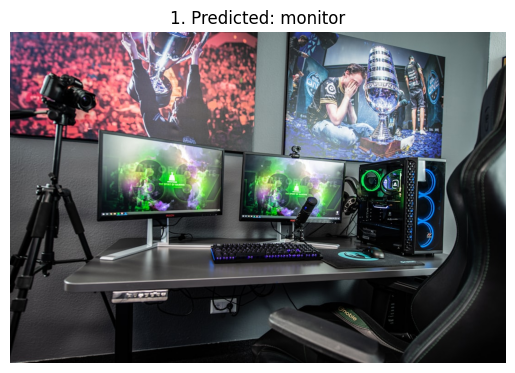

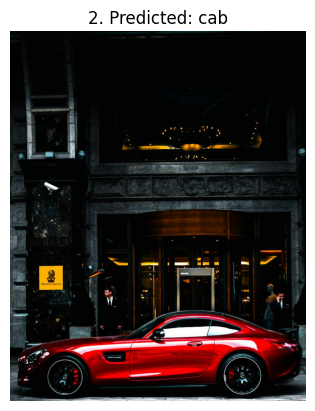

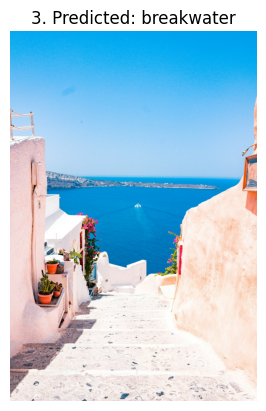

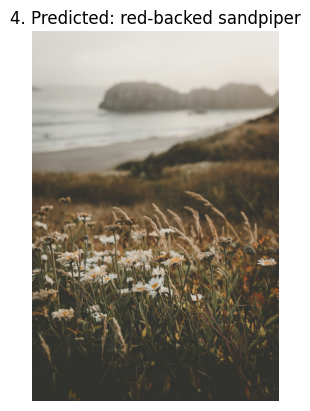

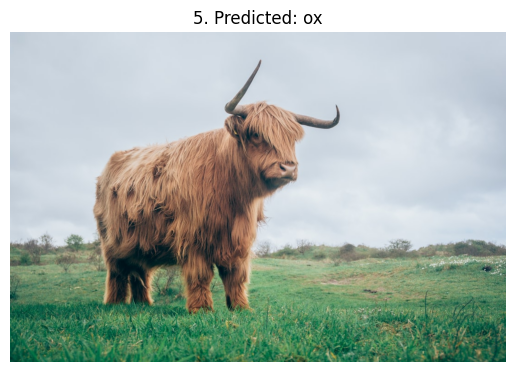

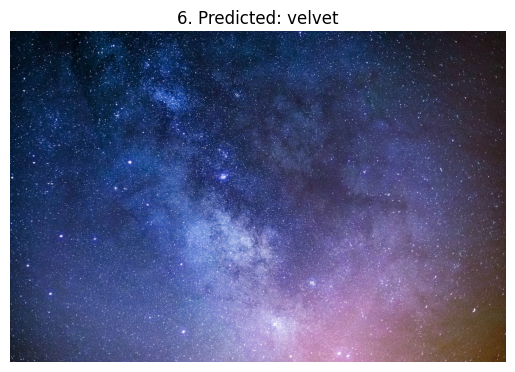

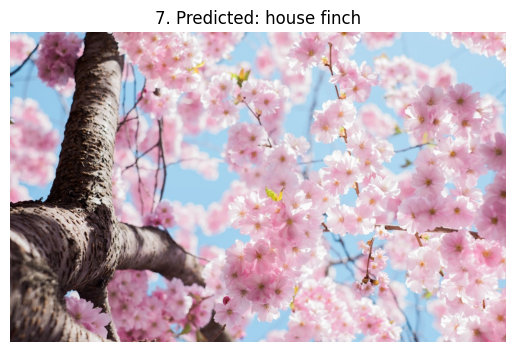

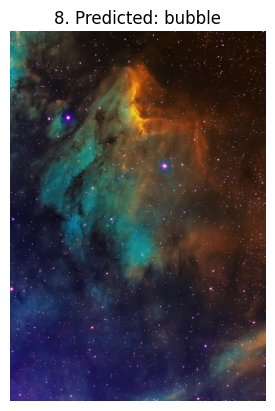

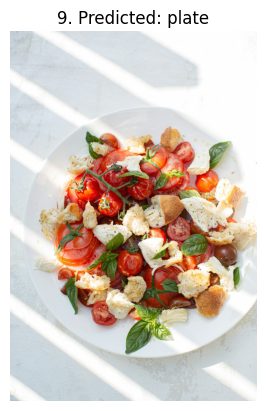

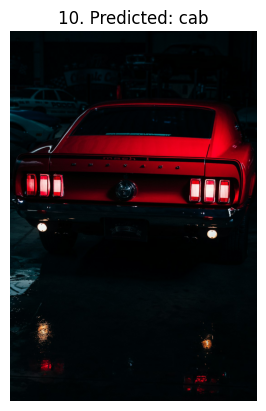

In [12]:
for idx, sample in enumerate(samples[:10]):  # Preview only 10 at a time
    img_path = sample["file_path"]
    category = sample["category"]

    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"{idx+1}. Predicted: {category}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Couldn't open image: {img_path} | Error: {e}")